### Creates a correlation matrix
This used to see if we should remove or combine some features

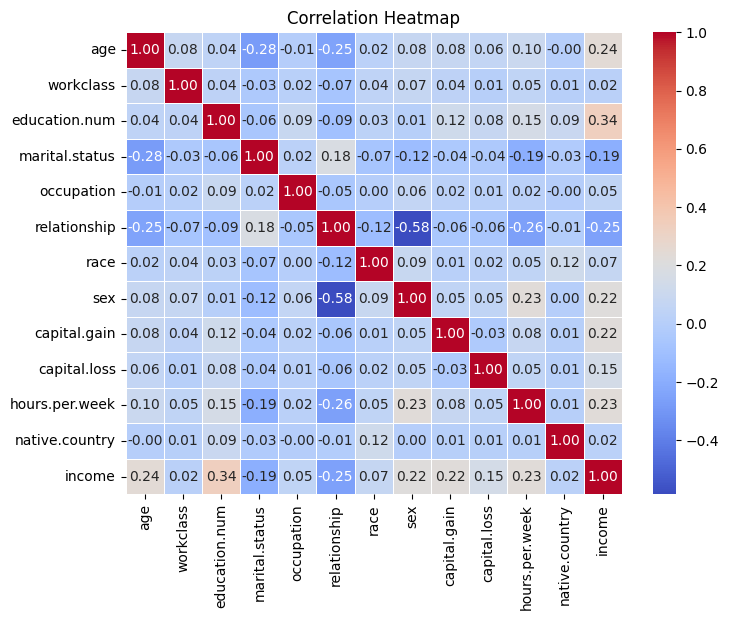

age         workclass  fnlwgt     education  education.num marital.status  \
0    90                 ?   77053       HS-grad              9        Widowed   
1    82           Private  132870       HS-grad              9        Widowed   
2    66                 ?  186061  Some-college             10        Widowed   
3    54           Private  140359       7th-8th              4       Divorced   
4    41           Private  264663  Some-college             10      Separated   
5    34           Private  216864       HS-grad              9       Divorced   
6    38           Private  150601          10th              6      Separated   
7    74         State-gov   88638     Doctorate             16  Never-married   
8    68       Federal-gov  422013       HS-grad              9       Divorced   
9    41           Private   70037  Some-college             10  Never-married   
10   45           Private  172274     Doctorate             16       Divorced   
11   38  Self-emp-not-inc  164526   Prof-school             15  Never-married   
12   52           Private  129177     Bachelors             13        Widowed   
13   32           Private  136204       Masters             14      Separated   
14   51                 ?  172175     Doctorate             16  Never-married   
15   46           Private   45363   Prof-school             15       Divorced   
16   45           Private  172822          11th              7       Divorced   
17   57           Private  317847       Masters             14       Divorced   
18   22           Private  119592    Assoc-acdm             12  Never-married   
19   34           Private  203034     Bachelors             13      Separated   

           occupation    relationship   race     sex  capital.gain  \
0                   ?   Not-in-family  White  Female             0   
1     Exec-managerial   Not-in-family  White  Female             0   
2                   ?       Unmarried  Black  Female             0   
3   Machine-op-inspct       Unmarried  White  Female             0   
4      Prof-specialty       Own-child  White  Female             0   
5       Other-service       Unmarried  White  Female             0   
6        Adm-clerical       Unmarried  White    Male             0   
7      Prof-specialty  Other-relative  White  Female             0   
8      Prof-specialty   Not-in-family  White  Female             0   
9        Craft-repair       Unmarried  White    Male             0   
10     Prof-specialty       Unmarried  Black  Female             0   
11     Prof-specialty   Not-in-family  White    Male             0   
12      Other-service   Not-in-family  White  Female             0   
13    Exec-managerial   Not-in-family  White    Male             0   
14                  ?   Not-in-family  White    Male             0   
15     Prof-specialty   Not-in-family  White    Male             0   
16   Transport-moving   Not-in-family  White    Male             0   
17    Exec-managerial   Not-in-family  White    Male             0   
18  Handlers-cleaners   Not-in-family  Black    Male             0   
19              Sales   Not-in-family  White    Male             0   

    capital.loss  hours.per.week native.country income  
0           4356              40  United-States  <=50K  
1           4356              18  United-States  <=50K  
2           4356              40  United-States  <=50K  
3           3900              40  United-States  <=50K  
4           3900              40  United-States  <=50K  
5           3770              45  United-States  <=50K  
6           3770              40  United-States  <=50K  
7           3683              20  United-States   >50K  
8           3683              40  United-States  <=50K  
9           3004              60              ?   >50K  
10          3004              35  United-States   >50K  
11          2824              45  United-States   >50K  
12          2824              20  United-States   >50K  
13          2824              55 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

df = pd.read_csv('./Datasets/adult.csv', comment = '#')

# First, create a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()
df_encoded.drop(['fnlwgt', 'education'], axis=1, inplace=True)

# drop all rows that contain '?'
df_encoded = df_encoded[(df_encoded != '?').all(axis=1)]

# Apply label encoding to categorical columns
categorical_columns = ['workclass', 'marital.status', 'occupation', 
                      'relationship', 'race', 'sex', 'native.country', 'income']

for column in categorical_columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])

matrix = df_encoded.corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#df_encoded.head(10)
#df_encoded.info()
df.head(20)


### Creates a pairplot
This demonstrates that we need a model that is appropriate for discrete data (Decision Tree, Random Forest, Naive Bayes)

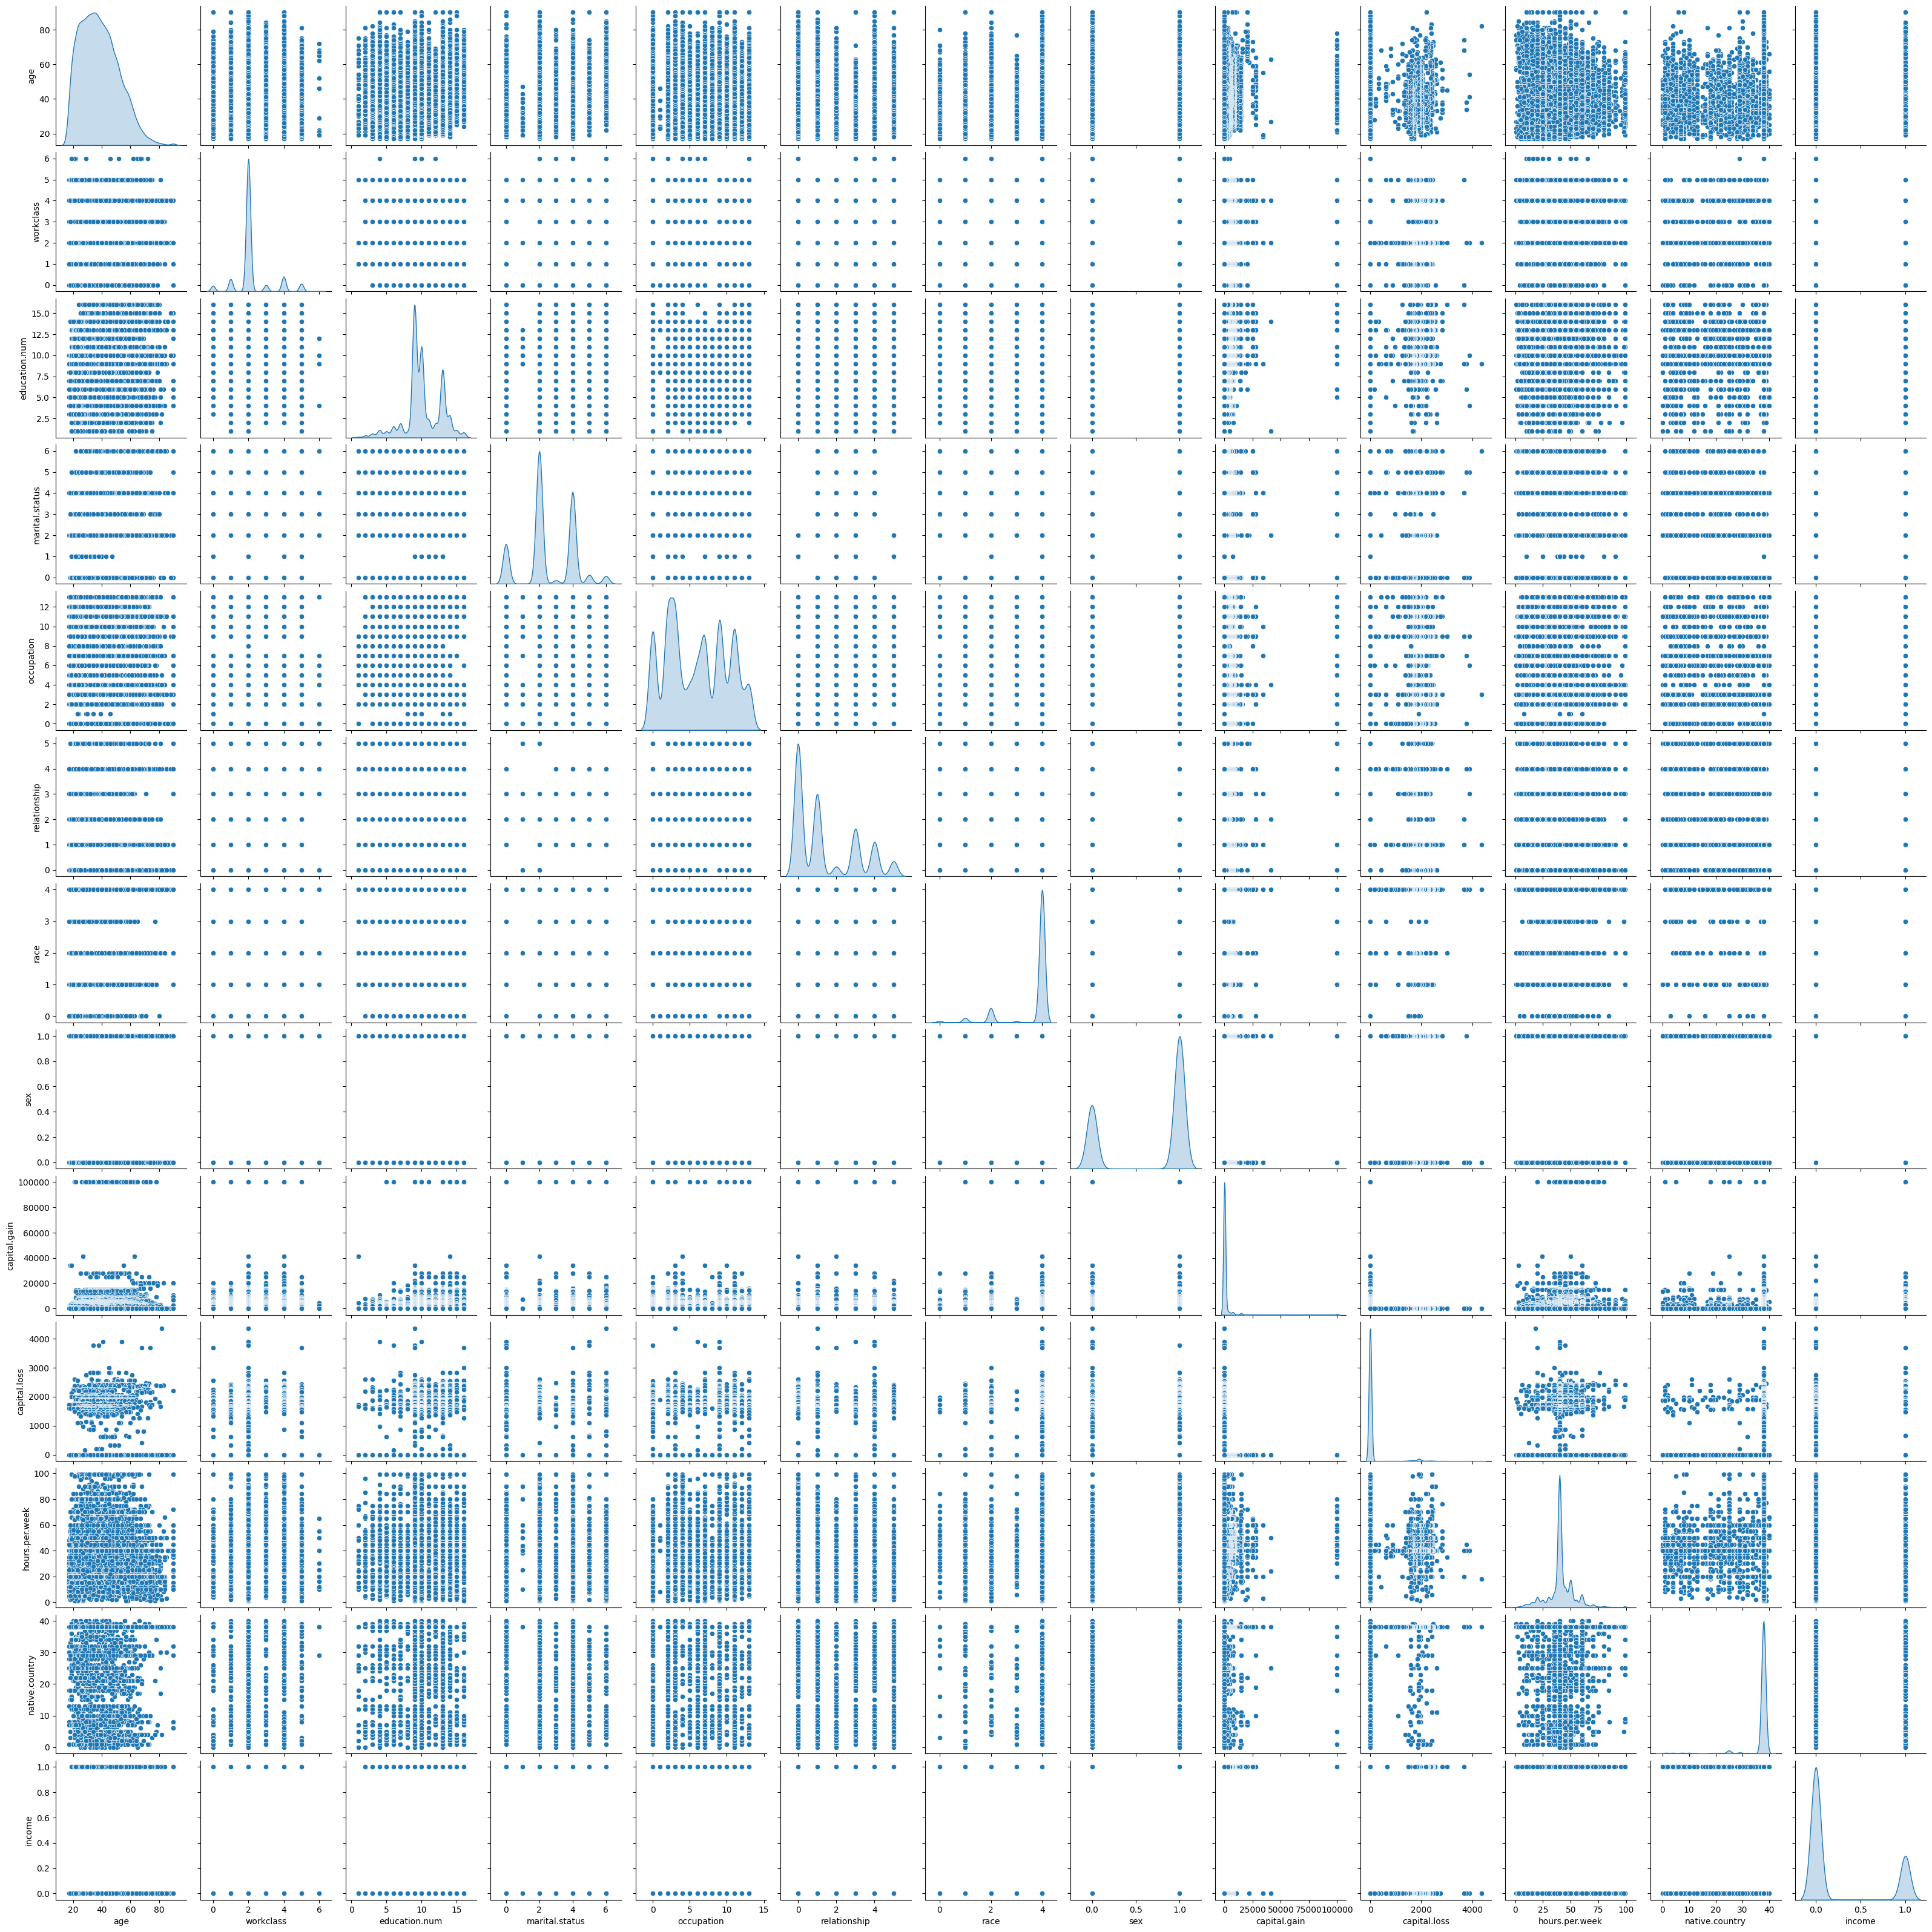

In [30]:
sns.pairplot(df_encoded, diag_kind="kde")
plt.show()